### Shallow Neural Network

Let's create a simple neural network without convolution layer just so that we can compare it's accuracy and time taken with later one.

In [7]:
import time

In [1]:
import tensorflow as tf

# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Normalize the pixel values
training_images = training_images / 255.0
test_images = test_images / 255.0

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
# Define the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [3]:
# Setup training parameters
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Train

start_time = time.time()
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)
end_time = time.time()
print(f'\n Total Training time is {end_time - start_time} seconds')


MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4931 - accuracy: 0.8266
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3712 - accuracy: 0.8648
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3329 - accuracy: 0.8789
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3116 - accuracy: 0.8850
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2938 - accuracy: 0.8919

 Total Training time is 42.247448205947876 seconds


In [9]:
# Evaluate
print(f'\n Model Evaluation \n')
test_loss = model.evaluate(test_images, test_labels)


 Model Evaluation 

313/313 [==============================] - 1s 2ms/step - loss: 0.3402 - accuracy: 0.8764


### Convolution Neural Network

Let's add convolution and pooling layers to our network.

In [10]:
model = tf.keras.models.Sequential([
    
    # Add convolutions and max pooling
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Add the same layers as before
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [12]:
# Setup training parameters
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Train the model
start_time = time.time()
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)
end_time = time.time()
print(f'\n Total Training time is {end_time - start_time} seconds')


MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 52s 27ms/step - loss: 0.4757 - accuracy: 0.8269
Epoch 2/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.3153 - accuracy: 0.8861
Epoch 3/5
1875/1875 [==============================] - 50s 27ms/step - loss: 0.2731 - accuracy: 0.8996
Epoch 4/5
1875/1875 [==============================] - 50s 27ms/step - loss: 0.2424 - accuracy: 0.9102
Epoch 5/5
1875/1875 [==============================] - 50s 26ms/step - loss: 0.2173 - accuracy: 0.9203

 Total Training time is 263.92272448539734 seconds


In [14]:
# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)


MODEL EVALUATION:
313/313 [==============================] - 4s 11ms/step - loss: 0.2713 - accuracy: 0.9010


We can observe the slight increase in both training and testing accuracy when convolution is used.

### Visualizing the convolutions and Pooling

The cell below prints the first 100 labels in the test set, and you can see that the ones at index 0, index 23 and index 28 are all the same value (i.e. 9). They're all shoes.<br> Let's take a look at the result of running the convolution on each, and we'll begin to see common features between them emerge.<br> Now, when the dense layer is training on that data, it's working with a lot less, and it's perhaps finding a commonality between shoes based on this convolution/pooling combination.

1/1 [==============================] - 0s 22ms/step


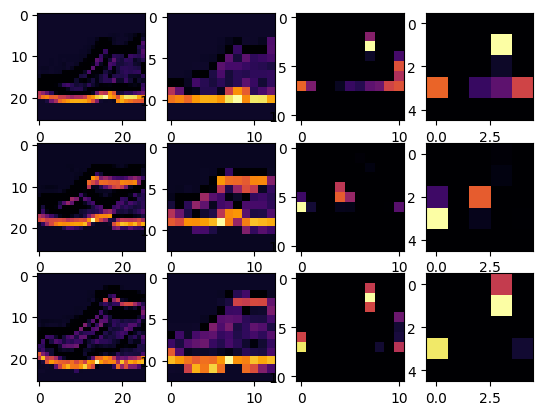

In [15]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

### Another Convolution model

In [16]:
model = tf.keras.models.Sequential([
    
    # Add convolutions and max pooling
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Add the same layers as before
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [18]:
# Setup training parameters
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
# Train the model
start_time = time.time()
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)
end_time = time.time()
print(f'\n Total Training time is {end_time - start_time} seconds')


MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 98s 52ms/step - loss: 0.4404 - accuracy: 0.8398
Epoch 2/5
1875/1875 [==============================] - 94s 50ms/step - loss: 0.2963 - accuracy: 0.8919
Epoch 3/5
1875/1875 [==============================] - 93s 49ms/step - loss: 0.2501 - accuracy: 0.9066
Epoch 4/5
1875/1875 [==============================] - 92s 49ms/step - loss: 0.2196 - accuracy: 0.9187
Epoch 5/5
1875/1875 [==============================] - 92s 49ms/step - loss: 0.1933 - accuracy: 0.9271

 Total Training time is 503.5225398540497 seconds


In [20]:
# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)


MODEL EVALUATION:
313/313 [==============================] - 4s 12ms/step - loss: 0.2820 - accuracy: 0.8963


We can observe the slight increase in both training and testing accuracy when convolution is used.

### Visualizing the convolutions and Pooling

The cell below prints the first 100 labels in the test set, and you can see that the ones at index 0, index 23 and index 28 are all the same value (i.e. 9). They're all shoes.<br> Let's take a look at the result of running the convolution on each, and we'll begin to see common features between them emerge.<br> Now, when the dense layer is training on that data, it's working with a lot less, and it's perhaps finding a commonality between shoes based on this convolution/pooling combination.

1/1 [==============================] - 0s 81ms/step


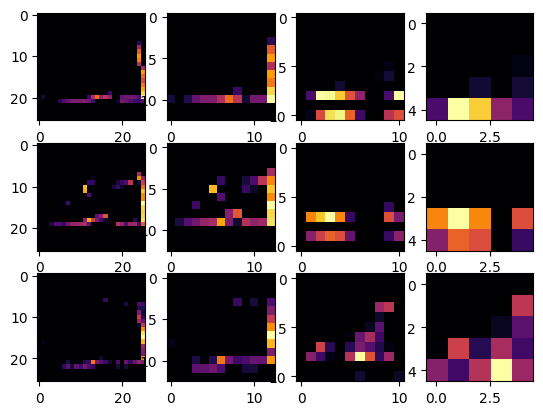

In [21]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)